# Sentiment Analysis of car reviews

### 1. Data cleaning -

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
car = pd.read_csv("Car_Review_suzuki.csv",engine='python')
car.head()

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,0,on 04/08/10 13:10 PM (PDT),Keair,2008 Suzuki Reno Hatchback 4dr Hatchback w/Con...,My '08 Reno,"I just bought my '08 Reno a few days ago, and...",4.625
1,1,on 02/04/10 02:21 AM (PST),Tony,2008 Suzuki Reno Hatchback 4dr Hatchback (2.0L...,Great Buy,"I bought this '08 Reno with 2,400 miles on it...",3.750
2,2,on 09/02/09 14:37 PM (PDT),rc,2008 Suzuki Reno Hatchback 4dr Hatchback (2.0L...,fun small car,We bought this car with a sonata in mind but ...,4.625
3,3,on 05/30/08 23:13 PM (PDT),rye,2008 Suzuki Reno Hatchback 4dr Hatchback w/Con...,Practical with a small kick,I drive 90 miles a day and I get from 420 mil...,4.000
4,4,on 05/26/08 14:58 PM (PDT),Don,2008 Suzuki Reno Hatchback 4dr Hatchback (2.0L...,Better than experts say it is,I just purchased this vehicle but thought it ...,4.250


In [3]:
car = car.iloc[:,1:]
car.head()

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,on 04/08/10 13:10 PM (PDT),Keair,2008 Suzuki Reno Hatchback 4dr Hatchback w/Con...,My '08 Reno,"I just bought my '08 Reno a few days ago, and...",4.625
1,on 02/04/10 02:21 AM (PST),Tony,2008 Suzuki Reno Hatchback 4dr Hatchback (2.0L...,Great Buy,"I bought this '08 Reno with 2,400 miles on it...",3.750
2,on 09/02/09 14:37 PM (PDT),rc,2008 Suzuki Reno Hatchback 4dr Hatchback (2.0L...,fun small car,We bought this car with a sonata in mind but ...,4.625
3,on 05/30/08 23:13 PM (PDT),rye,2008 Suzuki Reno Hatchback 4dr Hatchback w/Con...,Practical with a small kick,I drive 90 miles a day and I get from 420 mil...,4.000
4,on 05/26/08 14:58 PM (PDT),Don,2008 Suzuki Reno Hatchback 4dr Hatchback (2.0L...,Better than experts say it is,I just purchased this vehicle but thought it ...,4.250


In [4]:
car.info()
car.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3690 entries, 0 to 3689
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Review_Date    3073 non-null   object 
 1   Author_Name    2933 non-null   object 
 2   Vehicle_Title  2933 non-null   object 
 3   Review_Title   2933 non-null   object 
 4   Review         2933 non-null   object 
 5   Rating         2793 non-null   float64
dtypes: float64(1), object(5)
memory usage: 173.1+ KB


(3690, 6)

In [5]:
car.isnull().sum()

Review_Date      617
Author_Name      757
Vehicle_Title    757
Review_Title     757
Review           757
Rating           897
dtype: int64

In [6]:
car.dropna(inplace=True)
car.shape

(2793, 6)

In [7]:
car.drop(["Review_Date","Author_Name","Vehicle_Title"],axis=1,inplace=True)
car.head()

,Review_Title,Review,Rating
0,My '08 Reno,"I just bought my '08 Reno a few days ago, and...",4.625
1,Great Buy,"I bought this '08 Reno with 2,400 miles on it...",3.750
2,fun small car,We bought this car with a sonata in mind but ...,4.625
3,Practical with a small kick,I drive 90 miles a day and I get from 420 mil...,4.000
4,Better than experts say it is,I just purchased this vehicle but thought it ...,4.250


### Data Visualization-

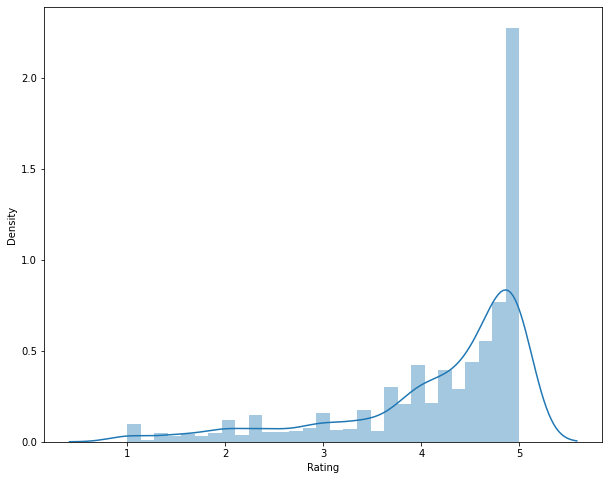

In [8]:
plt.figure(figsize=[10,8])
sns.distplot(car.Rating)
plt.show()

### Data processing -

In [9]:
car["Review"] = car["Review_Title"] + " " + car["Review"]
car.head()

,Review_Title,Review,Rating
0,My '08 Reno,My '08 Reno I just bought my '08 Reno a few d...,4.625
1,Great Buy,"Great Buy I bought this '08 Reno with 2,400 m...",3.750
2,fun small car,fun small car We bought this car with a sonat...,4.625
3,Practical with a small kick,Practical with a small kick I drive 90 miles ...,4.000
4,Better than experts say it is,Better than experts say it is I just purchase...,4.250


In [10]:
car.drop(["Review_Title"],axis=1,inplace=True)
car.head()

,Review,Rating
0,My '08 Reno I just bought my '08 Reno a few d...,4.625
1,"Great Buy I bought this '08 Reno with 2,400 m...",3.750
2,fun small car We bought this car with a sonat...,4.625
3,Practical with a small kick I drive 90 miles ...,4.000
4,Better than experts say it is I just purchase...,4.250


In [11]:
car.Rating = car.Rating.apply(lambda x : 1 if x>3 else 0)
car.head()

,Review,Rating
0,My '08 Reno I just bought my '08 Reno a few d...,1
1,"Great Buy I bought this '08 Reno with 2,400 m...",1
2,fun small car We bought this car with a sonat...,1
3,Practical with a small kick I drive 90 miles ...,1
4,Better than experts say it is I just purchase...,1


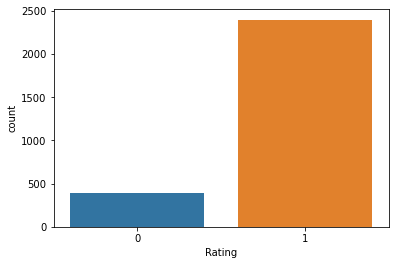

In [12]:
sns.countplot(car.Rating)
plt.show()

### Data cleaning for the negative reviews dataset

In [13]:
car2 = pd.read_csv('Car_Review_ford.csv', engine='python')
car2 = car2.iloc[:,1:]
car2.dropna(inplace=True)
car2.drop(["Review_Date","Author_Name","Vehicle_Title"],axis=1,inplace=True)
car2["Review"] = car2["Review_Title"] + " " + car2["Review"]
car2.drop(["Review_Title"],axis=1,inplace=True)
car2.Rating = car2.Rating.apply(lambda x : 1 if x>3 else 0)
car2.head()

,Review,Rating
0,2006 Mustang GT Doesn’t disappoint,1
1,DREAM CAR I bought mine 4/17 with 98K. Have b...,0
2,Great Ride There will always be a 05-09 musta...,1
3,I have wanted a Mustang for 40 years. I bough...,1
4,One owner I bought this car spankin new and i...,1


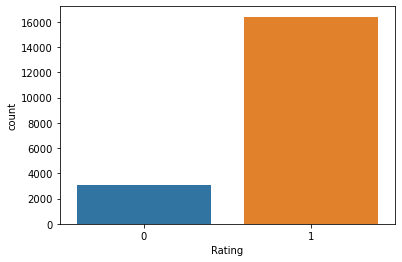

In [14]:
sns.countplot(car2.Rating)
plt.show()

In [15]:
car2[car2.Rating==0].count()

Review    3101
Rating    3101
dtype: int64

In [16]:
car2=car2[car2.Rating==0].head(2500)
car2.shape

(2500, 2)

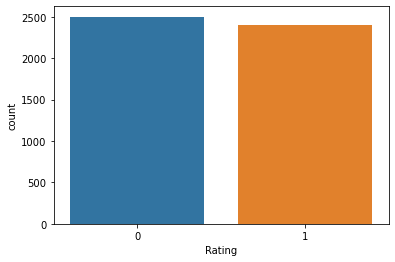

In [17]:
car = pd.concat([car[car.Rating==1],car2])
sns.countplot(car.Rating)
plt.show()

### Data processing for NLP

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, classification_report
from scikitplot.metrics import plot_confusion_matrix

In [21]:
lem = WordNetLemmatizer()

In [22]:
corpus = []
for entry in car.Review:
    new_entry = re.sub('[^a-zA-Z]',' ', str(entry))
    new_entry = new_entry.lower()
    new_entry = new_entry.split()
    new_entry = [lem.lemmatize(word) for word in new_entry if word not in set(stopwords.words('english'))]
    corpus.append(' '.join(new_entry))
corpus[0]

'reno bought reno day ago far impressed performance ride quality mpg bad could little better dollar could expect ride pretty good bit full tank pretty good compared much bigger vehicle roommate minivan take anywhere thirty forty dollar fill gas last half long mine first vehicle far happy well satisfied purchase'

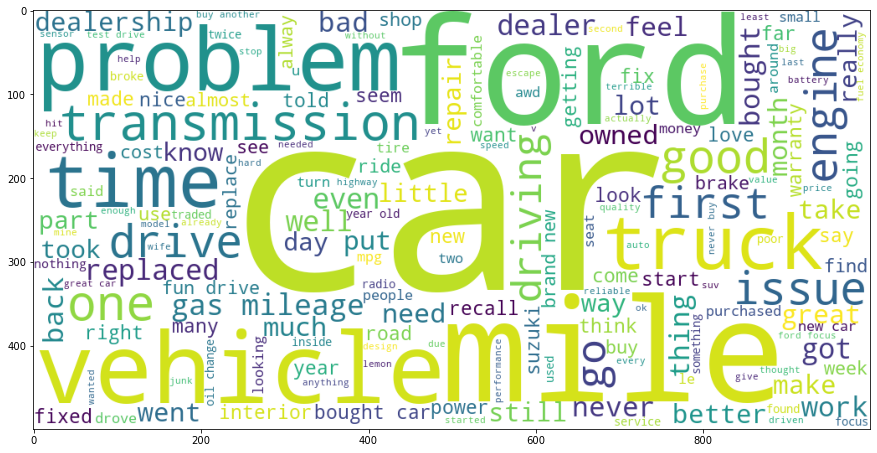

In [23]:
plt.figure(figsize=[15,10])
word_cloud=""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
        
wordcloud = WordCloud(width=1000, height=500, background_color="white", min_font_size=10).generate(word_cloud)
plt.imshow(wordcloud)

In [24]:
# cv = CountVectorizer(ngram_range=(1,2))
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus)
y = car.Rating

### Random Forest Classifer -

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
predictions1 = model1.predict(X_test)
print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

1.0
0.9387755102040817


Accuracy_score:  0.9387755102040817
Precision_score:  0.9464668094218416
Recall_score:  0.9266247379454927
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       503
           1       0.95      0.93      0.94       477

    accuracy                           0.94       980
   macro avg       0.94      0.94      0.94       980
weighted avg       0.94      0.94      0.94       980



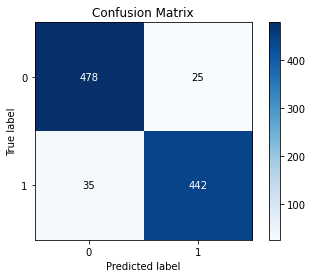

In [27]:
plot_confusion_matrix(y_test,predictions1)
acc_score = accuracy_score(y_test,predictions1)
pre_score = precision_score(y_test,predictions1)
rec_score = recall_score(y_test,predictions1)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions1)
print(cr)

### Hyperparameter Tuning to improve model -

In [28]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [100, 150, 200],
             'max_depth': [5, None],
             'min_samples_split': [5, 10 , 12, 15],
             'min_samples_leaf': [2, 5],
             'bootstrap': [True, False]}

In [29]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 150}

In [30]:
model = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap= grid_search.best_params_['bootstrap'])
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9974483286552692
0.9438775510204082


Accuracy_score:  0.9438775510204082
Precision_score:  0.9627192982456141
Recall_score:  0.9203354297693921
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       503
           1       0.96      0.92      0.94       477

    accuracy                           0.94       980
   macro avg       0.95      0.94      0.94       980
weighted avg       0.94      0.94      0.94       980



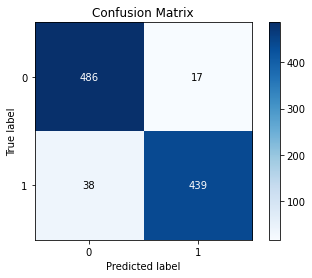

In [31]:

plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)